# Example: The Newton method for finding roots of functions 

The Newton method is an iterative method to solve equations of the form $f(x)=0$, i.e. to find *roots* or *zeros* $x^\ast$ such that $f(x^\ast) = 0$. Given an initial guess $x_0$, we repeat the iteration

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.$$

## Variables

Let's implement the Newton algorithm in Julia. We start from an initial condition $x_0$:

In [1]:
x_0 = 3

3

Julia always returns a value from any expression:

In [2]:
x_0

3

We can use LaTeX notation and tab completion for Unicode, e.g. `x\_0<TAB>`:

In [3]:
x₀ = 3

3

In [4]:
x₀

3

Values in Julia have associated **types**. We can find the type of a variable using the appropriately-named `typeof` function:

In [5]:
typeof(x₀)

Int64

We can guess that this means an integer with 64 bits. [This result will be `Int32` if you have a 32-bit machine.]

## Simple functions 

We need to define a function whose roots we wish to find. Let's find square roots of two, for example. Julia provides a concise mathematical syntax for defining simple functions:

In [6]:
f(x) = x^2 - 2

f (generic function with 1 method)

In [7]:
f(x_0)

7

We also need the derivative function, $f'$. For the moment, let's just give it my hand. (Later, we will see a neat way to avoid this.) We may like to write `f'`, using the apostrophe, `'`), but the apostrophe turns out to be a special character in Julia, so we get an error if we try to define a variable or function named `f'`:

In [8]:
f'(x) = 2x

LoadError: LoadError: syntax: invalid method name "f'"
while loading In[8], in expression starting on line 1

However, Unicode comes to our rescue: `f\prime<TAB>`:

In [9]:
f′(x) = 2x

f′ (generic function with 1 method)

Now we can do one step of our algorithm; mathematical operations work like we expect:

In [10]:
x_1 = x_0 - f(x_0) / f'(x_0)

2.0

Note that division of integers using `/` gives a floating-point result:

In [11]:
typeof(x_1)

Float64

## Iteration 

We now need to repeat such steps several times. Julia has `for` loops and `while` loops. As usual, we tend to use `for` loops when we know how many iterations we want, and `while` when we iterate until a certain condition is attained. 

### Ranges and arrays

Let's start with a simple `for`. Blocks of code in Julia *always* end with `end`:

In [12]:
for i in 1:5
    println(i)  # print the value of i followed by a new line
end

1


Here, a variable `i` is introduced that is *local* to the loop, i.e. it exists only inside the loop:

In [13]:
i

LoadError: LoadError: UndefVarError: i not defined
while loading In[13], in expression starting on line 1

`i` takes each value in the *iterable collection* `1:5`. Let's ask Julia what this object `1:5` is:

In [14]:
1:5

1:5

As usual, Julia returns a value, but in this case it is (at first glance) apparently not very helpful. What type is this object?

In [15]:
typeof(1:5)

2
3
4
5


UnitRange{Int64}

We see that Julia has a special type (actually, several different types) to represent **ranges**, in which the elements are calculated each time a new element is required, rather than stored. We can see all the elements that will be produced using the `collect` function:

In [16]:
v = collect(1:5)

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

The result is an object of a new type, an `Array`, in this case one whose elements are integers and that is of *dimension* 1. Note that `1` is *not* the number of elements in the array, which is called `length`:

In [17]:
length(v)

5

`Array`s are also iterable, so we can iterate over an `Array` using a `for` loop. 1-dimensional arrays, also called `Vector`s, are constructed using square brackets:

In [32]:
w = [3, 4, 7]
for i in w
    println(2*i)
end

6


 in depwarn at ./deprecated.jl:62
 in ntuple at deprecated.jl:49
 in convert at /Users/dsanders/.julia/v0.4/PyCall/src/conversions.jl:222
 in py2array at /Users/dsanders/.julia/v0.4/PyCall/src/conversions.jl:73
 in convert at /Users/dsanders/.julia/v0.4/PyCall/src/conversions.jl:429
 in pywrap at /Users/dsanders/.julia/v0.4/PyCall/src/PyCall.jl:305
 in pywrap at /Users/dsanders/.julia/v0.4/PyCall/src/PyCall.jl:304
 in __init__ at /Users/dsanders/.julia/v0.4/PyPlot/src/PyPlot.jl:149
 in include at ./boot.jl:254
 in include_from_node1 at ./loading.jl:133
 in reload_path at ./loading.jl:157
 in _require at ./loading.jl:69
 in require at ./loading.jl:52
 in include_string at loading.jl:99
 in execute_request_0x535c5df2 at /Users/dsanders/.julia/v0.4/IJulia/src/execute_request.jl:157
 in eventloop at /Users/dsanders/.julia/v0.4/IJulia/src/IJulia.jl:123
 in anonymous at task.jl:365
while loading /Users/dsanders/.julia/v0.4/PyPlot/src/PyPlot.jl, in expression starting on line 560


8
14


## Implementing the Newton method 

We are now ready to implement the Newton method:

In [19]:
x_0 = 3
x = x_0

for i in 1:10
    x_new = x - f(x) / f′(x)
    println(i, "\t", x_new)
    x = x_new
end
    

8
14
1	1.

In this case, we see that the method rapidly converges to one of the square roots of two. Which root it converges to depends on the initial condition:

In [20]:
x_0 = -3
x = x_0

for i in 1:10
    x_new = x - f(x) / f′(x)
    println(i, "\t", x_new)
    x = x_new
end

The Newton method is, in fact, not guaranteed to converge to a root (although it always does so if started "sufficiently close" to a root, at a rate that is known). Furthermore, *which* root it converges to can depend sensitively on the initial condition. Let's calculate this for several initial conditions.

First we create a set of initial conditions on the real line, say between -5 and 5. We now include a step size in the range:

In [21]:
initial_conditions = -5:0.1:5
collect(initial_conditions)   # use tab completion for long variable names!

101-element Array{Float64,1}:
 -5.0
 -4.9
 -4.8
 -4.7
 -4.6
 -4.5
 -4.4
 -4.3
 -4.2
 -4.1
 -4.0
 -3.9
 -3.8
  ⋮  
  3.9
  4.0
  4.1
  4.2
  4.3
  4.4
  4.5
  4.6
  4.7
  4.8
  4.9
  5.0

8333333333333333
2	1.4621212121212122
3	1.4149984298948028
4	1.4142137800471977
5	1.4142135623731118
6	1.414213562373095
7	1.4142135623730951
8	1.414213562373095
9	1.4142135623730951
10	1.414213562373095
1	-1.8333333333333333
2	-1.4621212121212122
3	-1.4149984298948028
4	-1.4142137800471977
5	-1.4142135623731118
6	-1.414213562373095
7	-1.4142135623730951
8	-1.414213562373095
9	-1.4142135623730951
10	-1.414213562373095


This range type is different:

In [22]:
typeof(-5:0.1:5)

FloatRange{Float64}

The array is also a new type: it is now an array of 64-bit floating-point numbers. We can also see that the `{...}` syntax thus gives the **parameters** of the `Array` type.

For each of these initial conditions, we will run the Newton algorithm for a certain number of steps and store the resulting value. We thus need a new array in which to store the results. One way of creating an array is using the `similar` function, which, by default, creates an array of the same type and same size, but with (currently) uninitialized values:

In [23]:
roots = similar(initial_conditions)

101-element Array{Float64,1}:
 2.22447e-314
 2.22447e-314
 2.22447e-314
 2.22447e-314
 2.22447e-314
 2.22816e-314
 2.22816e-314
 2.22816e-314
 2.22816e-314
 2.22816e-314
 2.22816e-314
 2.22447e-314
 2.22447e-314
 ⋮           
 6.45398e-314
 2.22816e-314
 2.22816e-314
 2.22447e-314
 2.22816e-314
 2.22816e-314
 2.22447e-314
 2.23287e-314
 2.22588e-314
 2.23287e-314
 0.0         
 0.0         

Now we do the work:

In [24]:
for (j, x_0) in enumerate(initial_conditions)
    x = x_0

    for i in 1:100
        x = x - f(x) / f′(x)
    end
    
    roots[j] = x
end

Here, `enumerate` iterates over `initial_conditions` but returns not only the value at each step, but also a counter. `(j, x_0`) is called a **tuple** (an ordered pair):

In [25]:
t = (3, 4)
typeof(t)

Tuple{Int64,Int64}

NB: In Julia v0.4, tuples have been completely reworked, and the resulting type is now
`Tuple{Int64,Int64}`.

In [26]:
roots

101-element Array{Float64,1}:
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
  ⋮      
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421

Julia does not show all of the contents of an array by default. We can see everything using `showall`:

In [27]:
showall(roots)

[-

We see that, apart from the `NaN` value, the results are not very exciting. Let's work harder with more initial conditions. We can find out how long the calculation takes using `@time` by wrapping the code in a `begin...end` block:


In [33]:
@time begin 
    initial_conditions = -100:0.01:100
    roots = similar(initial_conditions)

    for (j, x_0) in enumerate(initial_conditions)
        x = x_0

        for i in 1:1000
            x = x - f(x) / f′(x)
        end

        roots[j] = x
    end
end

   6.052 seconds      (100 M allocations: 1534 MB, 2.46% gc time)


## Packages and visualisation 

There are now many values stored in the array, so it is hopeless to examine them:

In [29]:
length(roots)

20001

Instead, we turn to **visualisation**. There are several plotting **packages** in Julia: [`Gadfly`]() is a native Julia library that produces beautiful plots; [`PyPlot`] is a Julian interface to the well-known `matplotlib` Python library. 

Let's start with `PyPlot`. First we need to download the package. Julia provides a built-in package manager, called `Pkg`, that gracefully handles dependencies, etc. To tell Julia that we require the package, we do

In [30]:
Pkg.add("PyPlot")

INFO: Nothing to be done


 7.546 seconds      (100 M allocations: 1540 MB, 2.07% gc time)


INFO: METADATA might be out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


This step is necessary only once. In each session where we need to use `PyPlot` we do

In [34]:
using PyPlot

Note that this process of loading a package currently can take a considerable time. Work is in progress to reduce this loading time.

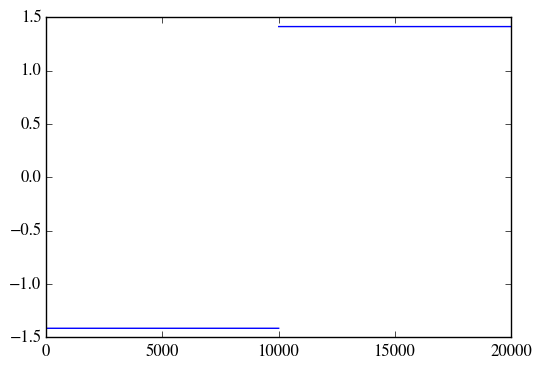

In [37]:
figure(figsize=(6,4))
plot(roots);

## Performance 1 

If we are used to the performance of C or Fortran, we might start to be unhappy with Julia's speed in this rather simple calculation. A close inspection of the output of the `@time` operation, however, gives us a very important clue: Julia apparently allocated over a gigabyte of memory to do a simple loop with some floating-point numbers! 

This is almost *always* a very strong signal that there is something very wrong in your Julia code! In our case, it is not at all clear what that could be. It turns out to be something very fundamental in Julia: 

[almost] **NEVER WORK WITH GLOBAL OBJECTS!**

Due to technical details about the way that Julia works, it turns out that **GLOBALS ARE BAD**. What is the solution? **PUT EVERYTHING INTO A FUNCTION!** Let's try following this advice. We take *exactly* the same code and just plop it into a new function. For longer functions, Julia has an alternative syntax:

In [50]:
function do_roots()
    initial_conditions = -100:0.01:100
    roots = similar(initial_conditions)

    for (j, x_0) in enumerate(initial_conditions)
        x = x_0

        for i in 1:1000
            x = x - f(x) / f′(x)
        end

        roots[j] = x
    end
    
    roots
end

do_roots (generic function with 1 method)

Note the last line of the function. This will automatically *return* the value of the `roots` object as the output of the function. So we can call it like this:

In [41]:
roots = do_roots()

20001-element Array{Float64,1}:
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
 -1.41421
  ⋮      
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421
  1.41421

Now how long did it take?

In [51]:
# a semi-colon suppresses output
@time roots = do_roots();
@time roots = do_roots();  

 195.909 milliseconds (6739 allocations: 450 KB)
 186.336 milliseconds (8 allocations: 157 KB)


It allocates a million times less memory, and is 50 times faster! This is the first lesson about performance in Julia: *always* put everything in a function.

Note that the first time we ran the function, it took longer. This is due to the fact that the first time a function is run with arguments of given types, the function is *compiled*. Subsequent runs with the same types of arguments reuse the previously-compiled code.

**Exercise**: Use a `while` loop with a suitable condition to improve the code for the Newton method.

## Generic functions and methods

Our code currently is not very flexible. To make it more flexible, we would like to pass in arguments to the `do_roots` function. We can make a version which takes as arguments the functions `f` and `f'`, for example. Functions are "first-class objects" in Julia, so they can just be passed around by name.

Let's redefine our function `do_roots` to accept these arguments:

In [52]:
function do_roots(f, f′)
    initial_conditions = -100:0.01:100
    roots = similar(initial_conditions)

    for (j, x_0) in enumerate(initial_conditions)
        x = x_0

        for i in 1:1000
            x = x - f(x) / f′(x)
        end

        roots[j] = x
    end
    
    roots
end

do_roots (generic function with 2 methods)

Note the output that Julia returns: "generic function with 2 methods". This is a sign that something interesting is happening. In fact, we have not "redefined" the function `do_roots`; rather, we have defined a *new version* of `do_roots`, which accepts a *different set of arguments*. (The collection *and types* of the arguments that a function accepts are called its **type signature**.)

Indeed, the function `do_roots` now has *two different methods* or versions:

In [53]:
methods(do_roots)

# 2 methods for generic function "do_roots":
do_roots() at In[50]:2
do_roots(f, f′) at In[52]:2

If we call `do_roots` with no arguments, the first version will be used; calling it with two arguments will call the second version. The process of choosing which "version" of a function to call is called *dispatch*. The fundamental fact in Julia is that (almost) all functions are such "generic functions" with multiple version, i.e. Julia is one of very few languages that use **multiple dispatch**. This turns out to be very natural for many applications in scientific computing.

The arguments `f` and `f'` in the second method of `do_roots` are names that are local to the function. We have functions of the same name defined globally, so we can pass those in:

In [55]:
@time do_roots(f, f′);

   2.864 seconds      (80064 k allocations: 1222 MB, 5.42% gc time)


This is faster than the first version of `do_roots`, but much slower than the good version. It turns out that Julia currently *cannot optimize* (inline) functions passed in this way. This is something to bear in mind -- there is (currently) a trade-off between user convenience and speed.

Julia also has *anonymous* functions, which allow us to pass in a function that we define "in the moment", without giving it a name. For example, let's do the exercise with a more interesting function:

In [61]:
@time roots = do_roots(x->(x-1)*(x-2)*(x-3), x->3x^2-12x+11);

  10.517 seconds      (220 M allocations: 3358 MB, 3.56% gc time)


We see that anonymous functions are currently very slow. However, there are workarounds, e.g. the `FastAnon` package.

Let's visualize the results for this function:

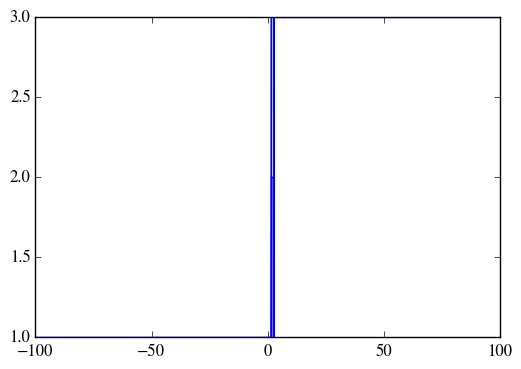

(-100.0,100.0)

 in depwarn at ./deprecated.jl:62
 in ntuple at deprecated.jl:49
 in convert at /Users/dsanders/.julia/v0.4/PyCall/src/conversions.jl:222
 in convert at /Users/dsanders/.julia/v0.4/PyCall/src/conversions.jl:846
 in pycall at /Users/dsanders/.julia/v0.4/PyCall/src/PyCall.jl:403
 in xlim at /Users/dsanders/.julia/v0.4/PyPlot/src/PyPlot.jl:371
 in include_string at loading.jl:99
 in execute_request_0x535c5df2 at /Users/dsanders/.julia/v0.4/IJulia/src/execute_request.jl:157
 in eventloop at /Users/dsanders/.julia/v0.4/IJulia/src/IJulia.jl:123
 in anonymous at task.jl:365
while loading In[64], in expression starting on line 3


In [64]:
figure(figsize=(6,4))
plot(-100:0.01:100, roots)
xlim()

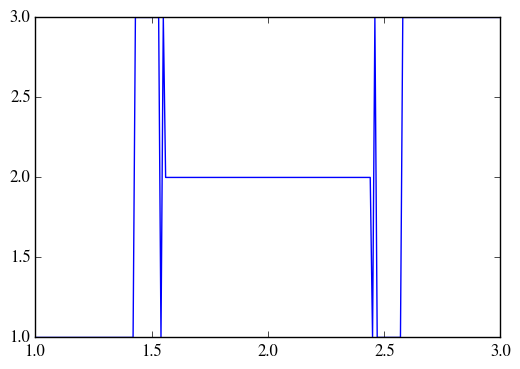

(1,3)

In [66]:
figure(figsize=(6,4))
plot(-100:0.01:100, roots)
xlim(1, 3)

## Complexifying Newton 

The previous result is still pretty boring. It turns out that the Newton method gets interesting if we look for roots of functions of *complex* numbers. [If you are not familiar with complex numbers, you can think of them as pairs of real numbers that have certain mathematical operations defined.]

Let's try to use the Newton method starting from initial conditions distributed in the complex plane, i.e. pairs $a + bi$, where $i = \sqrt{-1}$. First of all let's see how Julia handles complex numbers:

In [67]:
sqrt(-1)

LoadError: LoadError: DomainError:
while loading In[67], in expression starting on line 1

Oh dear, that didn't work very well. It turns out that Julia is carefully designed to respect, when possible, the type of the input argument. Indeed, let's ask Julia what it thinks `sqrt` means:

In [68]:
sqrt

sqrt (generic function with 12 methods)

We see that `sqrt` is a generic function, with the following methods:

In [69]:
methods(sqrt)

# 12 methods for generic function "sqrt":
sqrt(a::Complex{Float16}) at float16.jl:151
sqrt{T<:FloatingPoint}(z::Complex{T<:FloatingPoint}) at complex.jl:242
sqrt(z::Complex{T<:Real}) at complex.jl:266
sqrt(x::Float64) at math.jl:137
sqrt(x::Float32) at math.jl:138
sqrt(a::Float16) at float16.jl:150
sqrt(x::Base.MPFR.BigFloat) at mpfr.jl:348
sqrt(x::Base.GMP.BigInt) at mpfr.jl:356
sqrt(x::Real) at math.jl:139
sqrt{T<:Number}(::AbstractArray{T<:Number,1}) at operators.jl:356
sqrt{T<:Number}(::AbstractArray{T<:Number,2}) at operators.jl:357
sqrt{T<:Number}(::AbstractArray{T<:Number,N}) at operators.jl:359

Julia gives us a list of the available methods, together with links direct to the source code on GitHub (in IJulia) or locally (in Juno).

`sqrt()` acting on a `Float64` returns a `Float64` when it can, or throws a `DomainError` when its argument is negative. To get square roots in the complex plane, we must *start* with a complex number.

The names of types in Julia start with capital letters, so let's try `Complex`:

In [71]:
Complex

Complex{T<:Real}

As we will see later, types have functions with the same name that act as **constructors** to make objects of the type. Let's see the available functions with the name `Complex`. Note that output has changed rather a lot between Julia v0.3 and Julia v0.4:

In [73]:
methods(Complex)

5-element Array{Any,1}:
 call{T<:Real}(::Type{Complex{T<:Real}}, re::T<:Real, im::T<:Real)
 call(::Type{Complex{T<:Real}}, x::Real, y::Real) at complex.jl:7 
 call(::Type{Complex{T<:Real}}, x::Real) at complex.jl:8          
 call{T}(::Type{T}, arg) at essentials.jl:56                      
 call{T}(::Type{T}, args...) at essentials.jl:57                  

Now let's try playing with `Complex`:

In [74]:
a = Complex(3)

3 + 0im

In [75]:
typeof(a)

Complex{Int64}

In [76]:
b = Complex(3, 4.5)

3.0 + 4.5im

In [77]:
typeof(b)

Complex{Float64}

We see that `Complex` is also parametrised by the type of its real and imaginary parts.

We can also make complex numbers directly using `im`:

In [81]:
3.0 + 4.0im

3.0 + 4.0im

(Here, 4.0im is multiplication of 4.0 by `im`, which represents $i$, the imaginary unit.)

We can do complex arithmetic:

In [79]:
a * b

9.0 + 13.5im

What is happening here? Julia knows how to do `*` for complex numbers. Let's ask Julia what `*` is:

In [82]:
*

* (generic function with 135 methods)

So, mathematical operators *are generic functions too*! We can list all the ways to do `*`:

In [83]:
methods(*)

# 135 methods for generic function "*":
*(x::Bool, y::Bool) at bool.jl:38
*{T<:Unsigned}(x::Bool, y::T<:Unsigned) at bool.jl:53
*(x::Bool, z::Complex{T<:Real}) at complex.jl:116
*{T<:Number}(x::Bool, y::T<:Number) at bool.jl:49
*(z::Complex{T<:Real}, x::Bool) at complex.jl:117
*(y::Number, x::Bool) at bool.jl:55
*(x::Int8, y::Int8) at int.jl:16
*(x::UInt8, y::UInt8) at int.jl:16
*(x::Int16, y::Int16) at int.jl:16
*(x::UInt16, y::UInt16) at int.jl:16
*(x::Int32, y::Int32) at int.jl:16
*(x::UInt32, y::UInt32) at int.jl:16
*(x::Int64, y::Int64) at int.jl:16
*(x::UInt64, y::UInt64) at int.jl:16
*(x::Int128, y::Int128) at int.jl:456
*(x::UInt128, y::UInt128) at int.jl:457
*(x::Float32, y::Float32) at float.jl:205
*(x::Float64, y::Float64) at float.jl:206
*(z::Complex{T<:Real}, w::Complex{T<:Real}) at complex.jl:112
*(x::Real, z::Complex{T<:Real}) at complex.jl:118
*(z::Complex{T<:Real}, x::Real) at complex.jl:119
*(x::Rational{T<:Integer}, y::Rational{T<:Integer}) at rational.jl:177
*(a::Float16, b::Float16) at float16.jl:136
*(x::Base.GMP.BigInt, y::Base.GMP.BigInt) at gmp.jl:244
*(a::Base.GMP.BigInt, b::Base.GMP.BigInt, c::Base.GMP.BigInt) at gmp.jl:267
*(a::Base.GMP.BigInt, b::Base.GMP.BigInt, c::Base.GMP.BigInt, d::Base.GMP.BigInt) at gmp.jl:273
*(a::Base.GMP.BigInt, b::Base.GMP.BigInt, c::Base.GMP.BigInt, d::Base.GMP.BigInt, e::Base.GMP.BigInt) at gmp.jl:280
*(x::Base.GMP.BigInt, c::Union{UInt64,UInt16,UInt32,UInt8}) at gmp.jl:314
*(c::Union{UInt64,UInt16,UInt32,UInt8}, x::Base.GMP.BigInt) at gmp.jl:318
*(x::Base.GMP.BigInt, c::Union{Int8,Int16,Int64,Int32}) at gmp.jl:320
*(c::Union{Int8,Int16,Int64,Int32}, x::Base.GMP.BigInt) at gmp.jl:324
*(x::Base.MPFR.BigFloat, y::Base.MPFR.BigFloat) at mpfr.jl:206
*(x::Base.MPFR.BigFloat, c::Union{UInt64,UInt16,UInt32,UInt8}) at mpfr.jl:213
*(c::Union{UInt64,UInt16,UInt32,UInt8}, x::Base.MPFR.BigFloat) at mpfr.jl:217
*(x::Base.MPFR.BigFloat, c::Union{Int8,Int16,Int64,Int32}) at mpfr.jl:221
*(c::Union{Int8,Int16,Int64,Int32}, x::Base.MPFR.BigFloat) at mpfr.jl:225
*(x::Base.MPFR.BigFloat, c::Union{Float64,Float32,Float16}) at mpfr.jl:229
*(c::Union{Float64,Float32,Float16}, x::Base.MPFR.BigFloat) at mpfr.jl:233
*(x::Base.MPFR.BigFloat, c::Base.GMP.BigInt) at mpfr.jl:237
*(c::Base.GMP.BigInt, x::Base.MPFR.BigFloat) at mpfr.jl:241
*(a::Base.MPFR.BigFloat, b::Base.MPFR.BigFloat, c::Base.MPFR.BigFloat) at mpfr.jl:318
*(a::Base.MPFR.BigFloat, b::Base.MPFR.BigFloat, c::Base.MPFR.BigFloat, d::Base.MPFR.BigFloat) at mpfr.jl:324
*(a::Base.MPFR.BigFloat, b::Base.MPFR.BigFloat, c::Base.MPFR.BigFloat, d::Base.MPFR.BigFloat, e::Base.MPFR.BigFloat) at mpfr.jl:331
*(x::MathConst{sym}, y::MathConst{sym}) at constants.jl:71
*{f}(x::FixedPointNumbers.Fixed32{f}, y::FixedPointNumbers.Fixed32{f}) at /Users/dsanders/.julia/v0.4/FixedPointNumbers/src/fixed32.jl:36
*{T,f}(x::FixedPointNumbers.UfixedBase{T,f}, y::FixedPointNumbers.UfixedBase{T,f}) at /Users/dsanders/.julia/v0.4/FixedPointNumbers/src/ufixed.jl:87
*{T<:Number}(x::T<:Number, y::T<:Number) at promotion.jl:206
*(x::Number, y::Number) at promotion.jl:168
*{N}(a::Integer, index::Base.IteratorsMD.CartesianIndex{N}) at multidimensional.jl:70
*{T<:Number}(x::T<:Number, D::Base.LinAlg.Diagonal{T}) at linalg/diagonal.jl:66
*(y::Real, x::Base.Dates.Period) at dates/periods.jl:62
*{T,f}(n::Integer, ::FixedPointNumbers.UfixedConstructor{T,f}) at /Users/dsanders/.julia/v0.4/FixedPointNumbers/src/ufixed.jl:30
*(s::Real, p::Graphics.Vec2) at /Users/dsanders/.julia/v0.4/Graphics/src/Graphics.jl:64
*(s::Real, bb::Graphics.BoundingBox) at /Users/dsanders/.julia/v0.4/Graphics/src/Graphics.jl:151
*{T<:Number,S}(c::T<:Number, p::Polynomials.Poly{S}) at /Users/dsanders/.julia/v0.4/Polynomials/src/Polynomials.jl:132
*(x::Number) at operators.jl:74
*{T<:Union{Complex{Float32},Float64,Complex{Float64},Float32},S}(A::Union{SubArray{T<:Union{Complex{Float32},Float64,Complex{Float64},Float32},2,A<:DenseArray{T,N},I<:Tuple{Vararg{Union{Colon,Range{Int64},Int64}}},LD},DenseArray{

All of these are defined in Julia itself. (Although the definitions for basic types like `Int` are only shallow wrappers around underlying C code.) We see that generic functions can be a complicated "patchwork" made of different methods for different types.

We can find the exact method used for a given operation using `@which`:

In [84]:
@which a * b

*(z::Complex{T<:Real}, w::Complex{T<:Real}) at complex.jl:112

## Initial conditions: matrices

We are now ready to think about how to generate a grid of initial conditions of the form $a+bi$ in the complex plane, $\mathbb{C}$. Firstly, we could just iterate over the initial conditions in two repeated `for`s, e.g.

In [88]:
for i in -2:1
    for j in -2:1
        println("($i, $j)")
    end
end

(-2, -2)
(-2, -1)
(-2, 0)
(-2, 1)
(-1, -2)
(-1, -1)
(-1, 0)
(-1, 1)
(0, -2)
(0, -1)
(0, 0)
(0, 1)
(1, -2)
(1, -1)
(1, 0)
(1, 1)


Here we have used **string interpolation**: the *value* of the variable `i` is substituted into the string instead of the sequence `$i$`. [Note that this is not recommended for performance-critical applications.]

But we still require somewhere to store the results. It is natural to use a **matrix**. A simple way of generating a matrix is the `zeros` function:

In [89]:
zeros(3)

3-element Array{Float64,1}:
 0.0
 0.0
 0.0

We see that with a single element, we generate a *vector* of zeros, while

In [90]:
zeros(3, 3)

3x3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

gives a *matrix*, i.e. a 2-dimensional `Array`.

Multiple dispatch allows Julia to provide convenience versions of functions like this. For example:

In [93]:
zeros(-3:2)

6-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0

creates a vector of the same length as the range!

However, this does not work for two different ranges:

In [96]:
zeros(-3:2, -3:2)

LoadError: LoadError: MethodError: `convert` has no method matching convert(::Type{Array{T,N}}, ::Type{Float64}, ::UnitRange{Int64}, ::UnitRange{Int64})
This may have arisen from a call to the constructor Array{T,N}(...),
since type constructors fall back to convert methods.
Closest candidates are:
  Array{T,N}(::Type{T}, !Matched::NTuple{N,Int64})
  Array{T}(::Type{T}, !Matched::Integer)
  Array{T}(::Type{T}, !Matched::Integer, !Matched::Integer)
  ...
while loading In[96], in expression starting on line 1

We can use `length` for example:

In [99]:
linear_initial_conditions = -5:0.1:5
roots = zeros(length(linear_initial_conditions), length(linear_initial_conditions))

101x101 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

However, if we try to store a complex number in this matrix, we find a problem:

In [100]:
roots[1, 1] = 3+4im

LoadError: LoadError: InexactError()
while loading In[100], in expression starting on line 1

An `InexactError` is a sign that we are trying to put a value into a type that it "doesn't fit into", for example a `Float64` into an `Int64`, or, in this case, a complex number into a float. We must instead create the matrix to hold complex numbers:

In [101]:
linear_initial_conditions = -5:0.1:5
roots = zeros(Complex128, length(linear_initial_conditions), length(linear_initial_conditions))

101x101 Array{Complex{Float64},2}:
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
    ⋮                             ⋱                           ⋮     

Here, `Complex128` is just an alias (an alternative name) for `Complex{Float64}`, so called because two 64-bit `Float64`s require `128` bits of storage in total.

Now we can insert complex values into the matrix:

In [103]:
roots[1, 1] = 3+4im

3 + 4im

In [104]:
roots

101x101 Array{Complex{Float64},2}:
 3.0+4.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
    ⋮                             ⋱                           ⋮     

## Implementing Newton for complex functions 

We are now ready to make a version of Newton for complex functions. We will try to find cube roots of $1$ in the complex plane, by finding zeros of the function

In [7]:
f(z) = z^3 - 1

f (generic function with 1 method)

with derivative

In [8]:
f′(z) = 3z^2

f′ (generic function with 1 method)

In [9]:
function do_complex_roots(range=-5:0.1:5)  # default value

    L = length(range)
    
    roots = zeros(Complex128, L, L)

    for (i, x) in enumerate(range)
        for (j, y) in enumerate(range)
            
            z = x + y*im
            
            for k in 1:1000
                z = z - f(z) / f′(z)
            end

            roots[i,j] = z
        end
        
    end
    
    roots
end

do_complex_roots (generic function with 2 methods)

In [10]:
roots = do_complex_roots(-5:0.1:5)

101x101 Array{Complex{Float64},2}:
 -0.5-0.866025im  -0.5-0.866025im  …  -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im  …  -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im  …  -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
 -0.5-0.866025im  -0.5-0.866025im     -0.5+0.866025im  -0.5+0.866025im
     ⋮                             ⋱      

Now let's use `PyPlot` to plot the result. `PyPlot` only understands floating-point matrices, so we'll take the imaginary part:

In [12]:
using PyPlot

    call(Type{PyCall.PyDict}, Base.Associative{#K<:Any, Any}) at /Users/dsanders/.julia/v0.4/PyCall/src/conversions.jl:464
is ambiguous with: 
    call(Type{PyCall.PyDict}, Base.Associative{Any, #V<:Any}) at /Users/dsanders/.julia/v0.4/PyCall/src/conversions.jl:463.
To fix, define 
    call(Type{PyCall.PyDict}, Base.Associative{Any, Any})
before the new definition.


 in depwarn at ./deprecated.jl:62
 in ntuple at deprecated.jl:49
 in convert at /Users/dsanders/.julia/v0.4/PyCall/src/conversions.jl:222
 in py2array at /Users/dsanders/.julia/v0.4/PyCall/src/conversions.jl:73
 in convert at /Users/dsanders/.julia/v0.4/PyCall/src/conversions.jl:429
 in pywrap at /Users/dsanders/.julia/v0.4/PyCall/src/PyCall.jl:305
 in pywrap at /Users/dsanders/.julia/v0.4/PyCall/src/PyCall.jl:304
 in __init__ at /Users/dsanders/.julia/v0.4/PyPlot/src/PyPlot.jl:149
 in include at ./boot.jl:254
 in include_from_node1 at ./loading.jl:133
 in reload_path at ./loading.jl:157
 in _require at ./loading.jl:69
 in require at ./loading.jl:52
 in include_string at loading.jl:99
 in execute_request_0x535c5df2 at /Users/dsanders/.julia/v0.4/IJulia/src/execute_request.jl:157
 in eventloop at /Users/dsanders/.julia/v0.4/IJulia/src/IJulia.jl:123
 in anonymous at task.jl:365
while loading /Users/dsanders/.julia/v0.4/PyPlot/src/PyPlot.jl, in expression starting on line 560


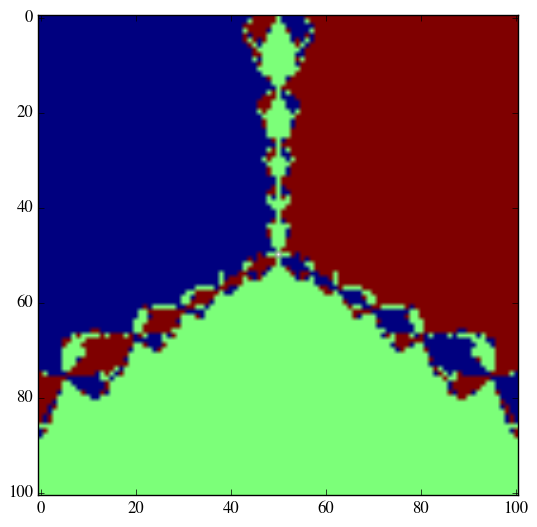

PyObject <matplotlib.image.AxesImage object at 0x3162552d0>

 in depwarn at ./deprecated.jl:62
 in ntuple at deprecated.jl:49
 in convert at /Users/dsanders/.julia/v0.4/PyCall/src/conversions.jl:222
 in convert at /Users/dsanders/.julia/v0.4/PyCall/src/conversions.jl:846
 in jl_Function_call at /Users/dsanders/.julia/v0.4/PyCall/src/callback.jl:36
 in pycall at /Users/dsanders/.julia/v0.4/PyCall/src/PyCall.jl:73
 in imshow at /Users/dsanders/.julia/v0.4/PyPlot/src/PyPlot.jl:371
 in include_string at loading.jl:99
 in execute_request_0x535c5df2 at /Users/dsanders/.julia/v0.4/IJulia/src/execute_request.jl:157
 in eventloop at /Users/dsanders/.julia/v0.4/IJulia/src/IJulia.jl:123
 in anonymous at task.jl:365
while loading In[13], in expression starting on line 1


In [13]:
imshow(imag(roots))

Julia uses "column-major" storage, whereas Python uses "row-major", so in fact we need to flip $x$ and $y$:

In [14]:
function do_complex_roots(range=-5:0.1:5)  # default value

    L = length(range)
    
    roots = zeros(Complex128, L, L)

    for (i, x) in enumerate(range)
        for (j, y) in enumerate(range)
            
            z = y + x*im
            
            for k in 1:1000
                z = z - f(z) / f′(z)
            end

            roots[i,j] = z
        end
        
    end
    
    roots
end

do_complex_roots (generic function with 2 methods)

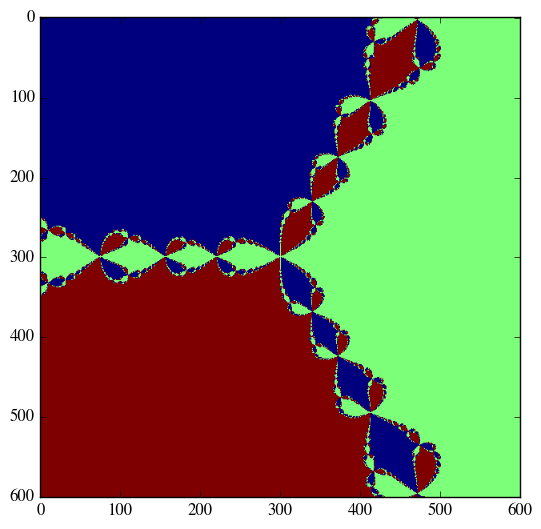

PyObject <matplotlib.image.AxesImage object at 0x319471b50>

In [15]:
imshow(imag(do_complex_roots(-3:0.01:3)))

## Array comprehensions 

Julia has a neat syntax for constructing arrays from iterables that is very similar to mathematical notation.
For example, the squares of the numbers from 1 to 10 is

$$\{x^2: x \in \{1,\ldots,10\} \},$$

i.e. "the set of $x^2$ for $x$ from $1$ to $10$. In Julia we can write

In [17]:
squares = [x^2 for x in 1:10]

10-element Array{Int64,1}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

Let's define a Newton function by

In [21]:
function newton(x0, N=100)
    x = x0
    
    for i in 1:N
        x = x - f(x) / f′(x)
    end
    
    x
end
    

newton (generic function with 2 methods)

Then our Newton fractal can be written very concisely as

In [23]:
methods(newton)

# 2 methods for generic function "newton":
newton(x0, N) at In[21]:2
newton(x0) at In[21]:2

Note that the effect of a default argument is simply to create an additional method.

In [22]:
function newton_fractal(range)
    [newton(b+a*im) for a in range, b in range]
end

newton_fractal (generic function with 1 method)

We can add labels using PyPlot

In [27]:
?text

search: text Text text3D text2D TextDisplay @text_str istext figtext atexit

Add text to the axes.

Add text in string `s` to axis at location `x`, `y`, data
coordinates.

Parameters
----------
x, y : scalars
    data coordinates

s : string
    text

fontdict : dictionary, optional, default: None
    A dictionary to override the default text properties. If fontdict
    is None, the defaults are determined by your rc parameters.

withdash : boolean, optional, default: False
    Creates a `~matplotlib.text.TextWithDash` instance instead of a
    `~matplotlib.text.Text` instance.

Other parameters
----------------
kwargs : `~matplotlib.text.Text` properties.
    Other miscellaneous text parameters.

Examples
--------
Individual keyword arguments can be used to override any given
parameter::

    >>> text(x, y, s, fontsize=12)

The default transform specifies that text is in data coords,
alternatively, you can specify text in axis coords (0,0 is
lower-left and 1,1 is upper-right).  The ex

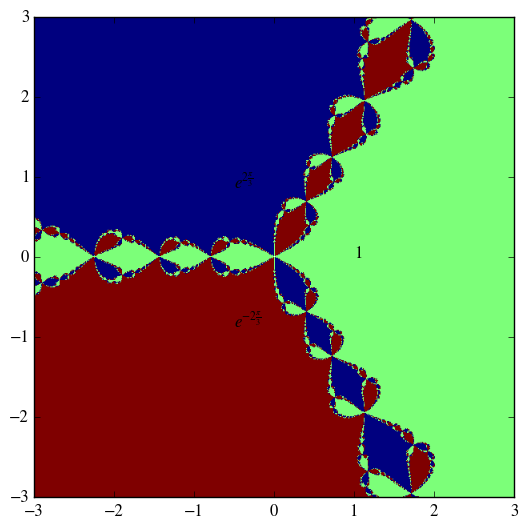

PyObject <matplotlib.text.Text object at 0x319ceaa10>

In [35]:
imshow(imag(newton_fractal(-3:0.01:3)), extent=(-3, 3, -3, 3))

text(1, 0, L"1")
text(reim(exp(2π*im/3))..., L"e^{2\frac{\pi}{3}}")
text(reim(exp(-2π*im/3))..., L"e^{-2\frac{\pi}{3}}")

Here, we have used Julia's `reim` function:

In [37]:
reim(exp(2π*im/3))

(-0.4999999999999998,0.8660254037844387)

It returns a tuple. The `...`, or *splat*, operator, unpacks the tuple into two arguments.
The `L"..."` notation is a special string macro available in the `LateXStrings` package used by `PyPlot`,
that makes a LaTeX string.

Exercise: Make a version that accepts functions and experiment with other complex polynomials. 

## Introspection and iteration protocol

How does Julia know how to iterate using `for` through a vector or range? Let's ask it:

In [38]:
function iterate(N)
    for i in 1:N
        println(i)
    end
end

iterate (generic function with 1 method)

Julia provides access to several layers between the high-level code we write and the low-level machine code that is finally produced by the compilation process:

In [40]:
@code_lowered iterate(10)

1-element Array{Any,1}:
 :($(Expr(:lambda, Any[:N], Any[Any[Any[:N,:Any,0],Any[symbol("#s262"),:Any,2],Any[:i,:Any,18]],Any[],2,Any[]], :(begin  # In[38], line 2:
        GenSym(0) = colon(1,N)
        #s262 = (top(start))(GenSym(0))
        unless (top(!))((top(done))(GenSym(0),#s262)) goto 1
        2: 
        GenSym(1) = (top(next))(GenSym(0),#s262)
        i = (top(getfield))(GenSym(1),1)
        #s262 = (top(getfield))(GenSym(1),2) # line 3:
        println(i)
        3: 
        unless (top(!))((top(!))((top(done))(GenSym(0),#s262))) goto 2
        1: 
        0: 
        return
    end))))

We see that there are three important functions: `start`, `next` and `done`.
For example, iterating through a Unicode `UTF8String` is complicated, since characters have different lengths:

In [42]:
s = "aαbβ"

"aαbβ"

In [43]:
for c in s
    println(c)
end

a
α
b
β


In [44]:
s[1]

'a'

In [45]:
s[2]

'α'

In [46]:
s[3]

LoadError: LoadError: invalid character index
while loading In[46], in expression starting on line 1

In [47]:
start(s)

1

In [48]:
next(s, 1)

('a',2)

In [49]:
next(s, 2)

('α',4)

In [50]:
done(s)

LoadError: LoadError: MethodError: `done` has no method matching done(::UTF8String)
Closest candidates are:
  done(::AbstractString, !Matched::Any)
while loading In[50], in expression starting on line 1